# Machine Learning for metabolomes of microbial communities

In [2]:
# imports
import sys
sys.path.append( '..' )

from helpers import *
from FIA import *
from ML4com import *
from VAE.vae import *

import warnings
warnings.simplefilter(action='ignore', category=sklearn.exceptions.UndefinedMetricWarning)

## Loading in

In [3]:
orig_dir = os.path.normpath(os.path.join(os.getcwd(), "/mnt/d/data/Com8_grown_together"))
data_dir  = os.path.normpath(os.path.join(os.getcwd(), "/mnt/d/runs/FIA/Com8_grown_together"))

strains = pd.read_csv( os.path.join(orig_dir, "strains.tsv"), sep="\t")
comm = pd.read_csv( os.path.join(orig_dir, "comb_one_hot.tsv"), sep="\t")
metData = pd.read_csv( os.path.join(orig_dir, "metData.tsv"), sep="\t")
metData.index = pd.read_csv( os.path.join(orig_dir, "metName.tsv"), sep="\t")

ys = comm
targets = strains["Organism"].values

### Data read in

In [4]:
source = "annotated"

if source == "latent":
    run_dir = os.path.normpath(os.path.join(os.getcwd(), "/mnt/d/runs/ML/latent"))

    backend_name = "tensorflow"
    computation = "cpu"
    name = "cos"
    project = f"vae_{backend_name}_{computation}_{name}"
    outdir = Path( os.path.normpath( os.path.join(run_dir, project)) )
    if not os.path.isdir(outdir):
        os.mkdir(outdir)

    X = pd.read_csv(f"/mnt/d/runs/VAE/results/encoded_mu_{name}.tsv", index_col=0, sep="\t")
elif source == "annotated":
    run_dir = os.path.normpath(os.path.join(os.getcwd(), "/mnt/d/runs/ML/annot"))
    name = "annotated_com8_grown_together_2"

    met_raw_pos = pd.read_excel( os.path.join(orig_dir,"FIA-Data Com8_20230717_P0024_msAV206-312.xlsx"), sheet_name="pos" )
    met_raw_neg = pd.read_excel( os.path.join(orig_dir,"FIA-Data Com8_20230717_P0024_msAV206-312.xlsx"), sheet_name="neg" )
    met_raw_comb = pd.concat( [total_ion_count_normalization( join_df_metNames(met_raw_pos) ),
                            total_ion_count_normalization( join_df_metNames(met_raw_neg) )] )

    outdir = Path( os.path.normpath( os.path.join( run_dir, name) ) )
    if not os.path.isdir(outdir):
        os.mkdir(outdir)

    X = met_raw_comb.transpose()

## Learning and tuning

In [5]:
n_trials = 200
inner_fold = 3
outer_fold = 5
verbosity = 0

### KNeighbors Classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier
algorithm_name = "Kneighbours classifier"

configuration_space = ConfigurationSpace()
hyperparameters = [ 
                    Constant("n_neighbors",   2),
                    Categorical("weights",    ["uniform", "distance"], default="uniform"),
                    Integer("leaf_size",      (10, 100), log=True, default=30),
                    Integer("p",              (1, 2), default=2),
                    Constant("metric",        "minkowski")
                  ]
configuration_space.add_hyperparameters( hyperparameters ) 

metrics_df, organism_metrics_df, overall_metrics_df = nested_cross_validate_model_sklearn( X=X, ys=ys, labels=targets, classifier=classifier,
                                                                                           configuration_space=configuration_space, n_trials=n_trials,
                                                                                           name=name, algorithm_name=algorithm_name, outdir=outdir,
                                                                                           fold=StratifiedKFold(n_splits=outer_fold), inner_fold=inner_fold, verbosity=verbosity)

plot_metrics_df(metrics_df, organism_metrics_df, overall_metrics_df, algorithm_name, outdir)

  0%|          | 0/8 [00:00<?, ?it/s]2024/06/28 15:31:00 INFO mlflow.tracking.fluent: Experiment with name 'annotated_com8_grown_together_2_Kneighbours classifier' does not exist. Creating a new experiment.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


 12%|█▎        | 1/8 [07:41<53:48, 461.24s/it]



























































































































































































































































































































































































































































































































































































[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


 25%|██▌       | 2/8 [12:50<37:10, 371.67s/it]



























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


 38%|███▊      | 3/8 [18:02<28:43, 344.63s/it]



























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.
[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


 50%|█████     | 4/8 [23:23<22:20, 335.18s/it]

[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.
[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.
[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


 56%|█████▌    | 111/200 [01:45<01:24,  1.06it/s]


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


 62%|██████▎   | 5/8 [29:06<16:54, 338.22s/it]





































































































































































































































[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.


[WARNING][config_selector.py:242] Could not return a new configuration after 16 retries.






























































































































































































































































































































































































































































































































































 62%|██████▎   | 5/8 [33:45<20:15, 405.15s/it]


KeyboardInterrupt: 

### Support-Vector Machine

100%|██████████| 8/8 [03:48<00:00, 28.62s/it]


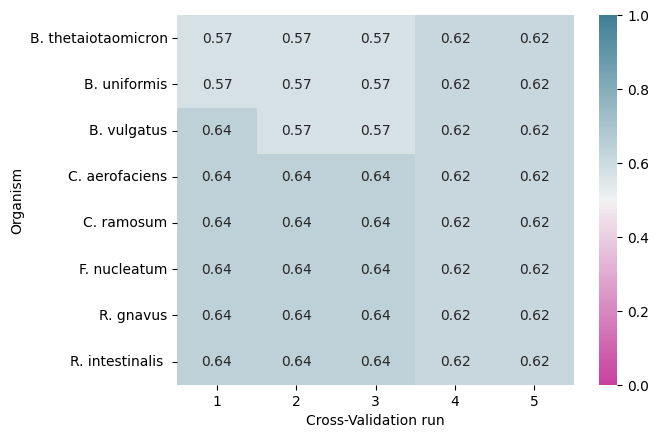

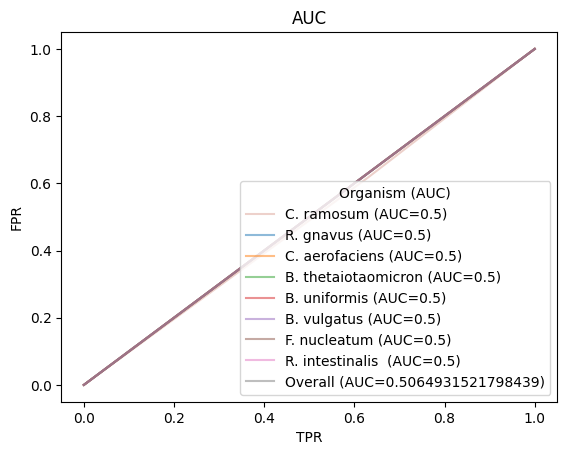

In [ ]:
from sklearn.svm import SVC 
classifier = SVC
algorithm_name = "Support-vector classifier"

configuration_space = ConfigurationSpace()
hyperparameters = [ 
                    Float("C",              (0.5, 2.0), default=1.0),
                    Categorical("kernel",   ["linear", "poly", "rbf", "sigmoid"], default="rbf"),
                    Integer("degree",       (2,4), default=3),
                    Categorical("gamma",    ["scale", "auto"]),
                    Float("coef0",          (1e-12, 1.0), log=True, default=0.01),
                    Constant("random_state", 42),
                  ]
conditions = [
                InCondition(hyperparameters[2], hyperparameters[1], ["poly"]),
                InCondition(hyperparameters[4], hyperparameters[1], ["poly", "sigmoid"]),
                InCondition(hyperparameters[3], hyperparameters[1], ["rbf", "poly", "sigmoid"])
             ]

configuration_space.add_hyperparameters( hyperparameters ) 
configuration_space.add_conditions(conditions)

metrics_df, organism_metrics_df, overall_metrics_df = nested_cross_validate_model_sklearn( X=X, ys=ys, labels=targets, classifier=classifier,
                                                                                           configuration_space=configuration_space, n_trials=n_trials,
                                                                                           name=name, algorithm_name=algorithm_name, outdir=outdir,
                                                                                           fold=StratifiedKFold(n_splits=outer_fold), inner_fold=inner_fold, verbosity=verbosity)

plot_metrics_df(metrics_df, organism_metrics_df, overall_metrics_df, algorithm_name, outdir)

### Gaussian Process Classifier

100%|██████████| 8/8 [03:57<00:00, 29.70s/it]


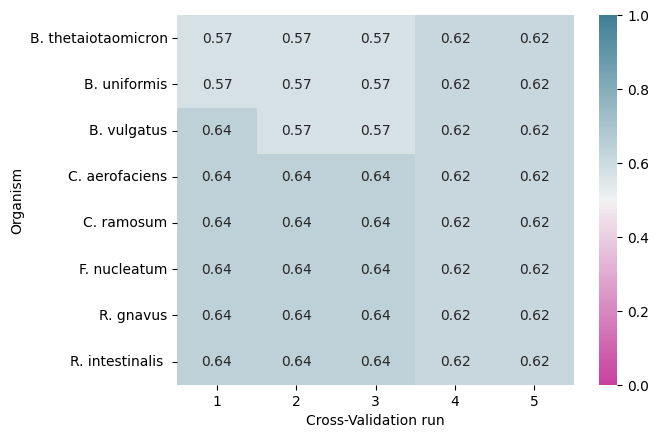

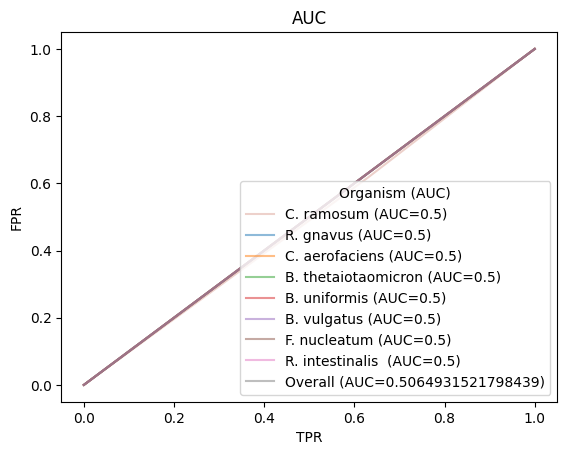

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
classifier = GaussianProcessClassifier
algorithm_name = "Gaussian process classifier"


configuration_space = ConfigurationSpace()
hyperparameters = [ 
                    Constant("random_state", 42),
                    Integer("max_iter_predict",   (10, 1000), log=True, default=100),
                  ]
configuration_space.add_hyperparameters( hyperparameters )

metrics_df, organism_metrics_df, overall_metrics_df = nested_cross_validate_model_sklearn( X=X, ys=ys, labels=targets, classifier=classifier,
                                                                                           configuration_space=configuration_space, n_trials=n_trials,
                                                                                           name=name, algorithm_name=algorithm_name, outdir=outdir,
                                                                                           fold=StratifiedKFold(n_splits=outer_fold), inner_fold=inner_fold, verbosity=verbosity)

plot_metrics_df(metrics_df, organism_metrics_df, overall_metrics_df, algorithm_name, outdir)

### Naive Bayes

100%|██████████| 8/8 [00:40<00:00,  5.08s/it]


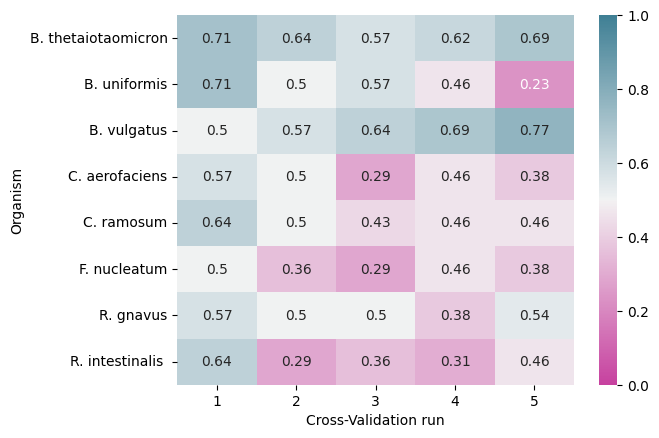

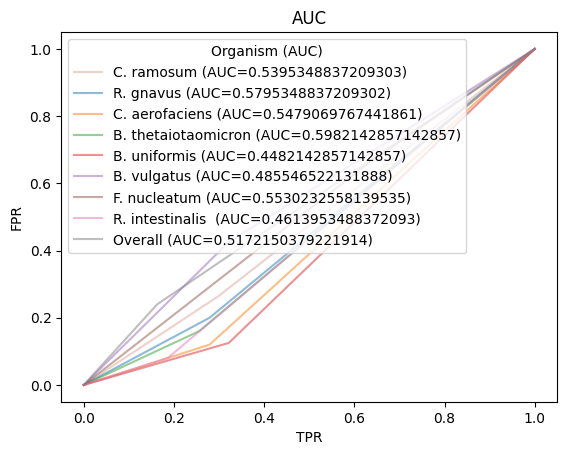

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB
algorithm_name = "Gaussian Naive-Bayes"

configuration_space = ConfigurationSpace()
hyperparameters = [ 
                    Constant("var_smoothing",   1e-9),
                  ]
configuration_space.add_hyperparameters( hyperparameters )

metrics_df, organism_metrics_df, overall_metrics_df = nested_cross_validate_model_sklearn( X=X, ys=ys, labels=targets, classifier=classifier,
                                                                                           configuration_space=configuration_space, n_trials=1,
                                                                                           name=name, algorithm_name=algorithm_name, outdir=outdir,
                                                                                           fold=StratifiedKFold(n_splits=outer_fold), inner_fold=inner_fold, verbosity=verbosity)

plot_metrics_df(metrics_df, organism_metrics_df, overall_metrics_df, algorithm_name, outdir)

### Decision Tree

100%|██████████| 8/8 [05:07<00:00, 38.39s/it]


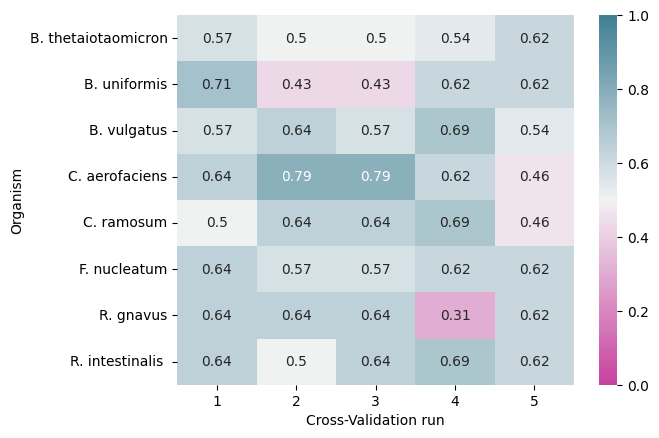

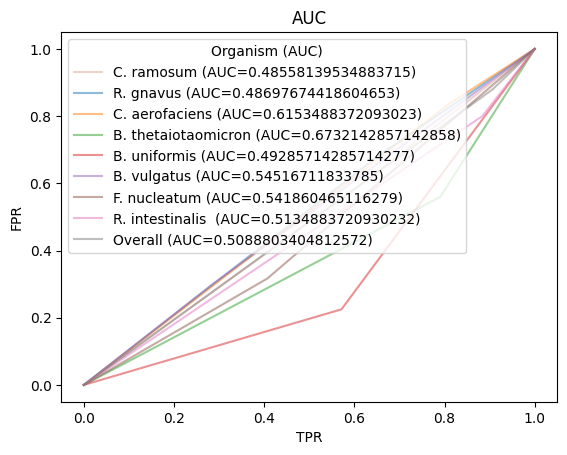

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier
algorithm_name = "Decision tree"

configuration_space = ConfigurationSpace()
ccp_alpha   = Float("ccp_alpha", (1e-3, 1e0), log=True, default=0.01)
configuration_space.add_hyperparameters([ccp_alpha])

metrics_df, organism_metrics_df, overall_metrics_df = nested_cross_validate_model_sklearn( X=X, ys=ys, labels=targets, classifier=classifier,
                                                                                           configuration_space=configuration_space, n_trials=n_trials,
                                                                                           name=name, algorithm_name=algorithm_name, outdir=outdir,
                                                                                           fold=StratifiedKFold(n_splits=outer_fold), inner_fold=inner_fold, verbosity=verbosity)

plot_metrics_df(metrics_df, organism_metrics_df, overall_metrics_df, algorithm_name, outdir)

## Random Forest

### Standard

100%|██████████| 8/8 [09:05<00:00, 68.21s/it]


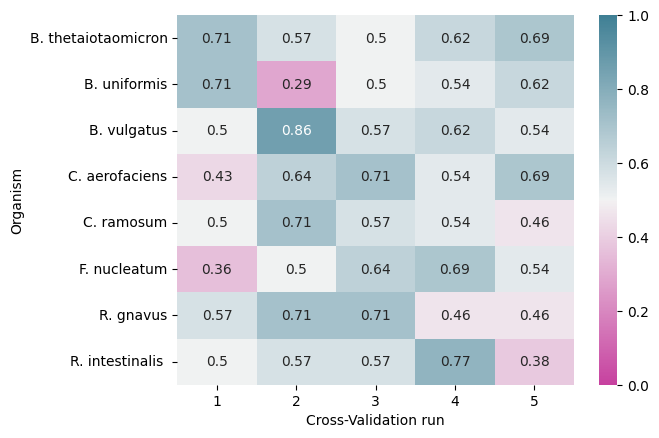

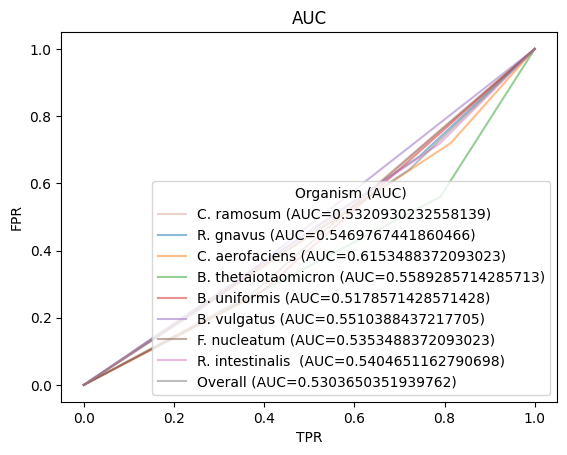

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier
algorithm_name = "Random forest"

configuration_space = ConfigurationSpace()
ccp_alpha       = Float("ccp_alpha", (1e-3, 1e-1), log=True, default=0.01)
n_estimators    = Integer("n_estimators", (10,1000), log=True, default=100)
max_depth       = Integer("max_depth", (5, 100), default=20)
configuration_space.add_hyperparameters([ccp_alpha, n_estimators, max_depth])

metrics_df, organism_metrics_df, overall_metrics_df = nested_cross_validate_model_sklearn( X=X, ys=ys, labels=targets, classifier=classifier,
                                                                                           configuration_space=configuration_space, n_trials=n_trials,
                                                                                           name=name, algorithm_name=algorithm_name, outdir=outdir,
                                                                                           fold=StratifiedKFold(n_splits=outer_fold), inner_fold=inner_fold, verbosity=verbosity)

plot_metrics_df(metrics_df, organism_metrics_df, overall_metrics_df, algorithm_name, outdir)

### Gradient Boosting

##### Extreme Gradiant Boosting

  0%|          | 0/8 [00:00<?, ?it/s]

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 initial design configurations and 0 additional configurations.


2024/05/29 16:33:33 INFO mlflow.tracking.fluent: Experiment with name 'cos_Extreme gradient boosting RF' does not exist. Creating a new experiment.


[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 829f77 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 54cb09 and rejected config 829f77 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config afbada and rejected config 54cb09 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
Mean accuracy: 0.7142857142857143
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.p

 12%|█▎        | 1/8 [00:53<06:16, 53.83s/it]

Mean accuracy: 0.3076923076923077
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 829f77 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 1db539 and rejected config 829f77 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][abstract_intensifier.py:590] Added config f8a8d4 and rejected config 1db539 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
Mean accuracy: 0.714285714285

 25%|██▌       | 2/8 [01:45<05:15, 52.60s/it]

Mean accuracy: 0.38461538461538464
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 829f77 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 35bb85 and rejected config 829f77 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
Mean accuracy: 0.42857142857142855
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.p

 38%|███▊      | 3/8 [02:42<04:33, 54.75s/it]

Mean accuracy: 0.6153846153846154
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 829f77 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 35bb85 and rejected config 829f77 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
Mean accuracy: 0.7142857142857143
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:

 50%|█████     | 4/8 [03:35<03:34, 53.72s/it]

Mean accuracy: 0.7692307692307693
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 829f77 as new incumbent because there are no incumbents yet.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
Mean accuracy: 0.42857142857142855
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenar

 62%|██████▎   | 5/8 [04:23<02:35, 51.76s/it]

Mean accuracy: 0.6153846153846154
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 829f77 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config d01567 and rejected config 829f77 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
Mean accuracy: 0.5
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 in

 75%|███████▌  | 6/8 [05:16<01:44, 52.33s/it]

Mean accuracy: 0.6153846153846154
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 829f77 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 35bb85 and rejected config 829f77 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
Mean accuracy: 0.42857142857142855
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py

 88%|████████▊ | 7/8 [06:13<00:53, 53.71s/it]

Mean accuracy: 0.5384615384615384
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 2 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config 829f77 as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 210bb5 and rejected config 829f77 as incumbent because it is not better than the incumbents on 1 instances:
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
Mean accuracy: 0.7142857142857143
[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 60 to 2 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:

100%|██████████| 8/8 [07:01<00:00, 52.73s/it]

Mean accuracy: 0.6923076923076923


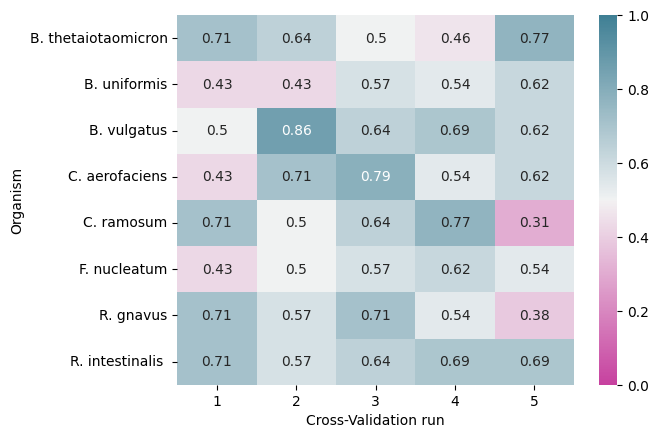

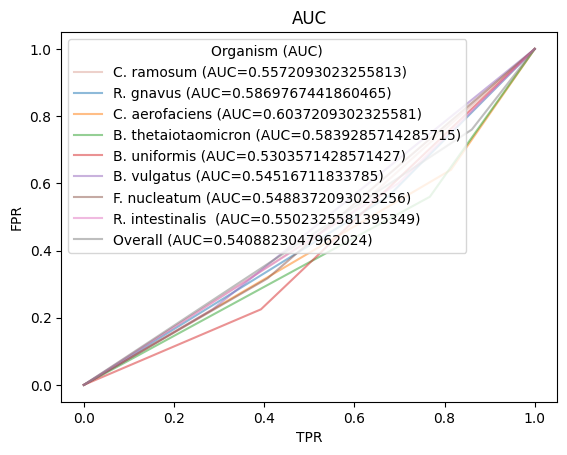

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier
algorithm_name = "Extreme gradient boosting RF"

configuration_space = ConfigurationSpace()
objective           = Constant( "objective",            "binary:logistic")
num_parallel_tree   = Constant( "num_parallel_tree",    4)
n_estimators        = Integer(  "n_estimators",         (10,1000), log=True, default=100)
max_depth           = Integer(  "max_depth",            (1, 100), default=20)
subsample           = Float(    "subsample",            (1e-1, 1e0), default=1e0)
learning_rate       = Float(    "learning_rate",        (1e-2, 5e-1), default=1e-1)
configuration_space.add_hyperparameters([objective, num_parallel_tree, n_estimators, max_depth, subsample, learning_rate])

metrics_df, organism_metrics_df, overall_metrics_df = nested_cross_validate_model_sklearn( X=X, ys=ys, labels=targets, classifier=classifier,
                                                                                           configuration_space=configuration_space, n_trials=n_trials,
                                                                                           name=name, algorithm_name=algorithm_name, outdir=outdir,
                                                                                           fold=StratifiedKFold(n_splits=outer_fold), inner_fold=inner_fold, verbosity=verbosity)

plot_metrics_df(metrics_df, organism_metrics_df, overall_metrics_df, algorithm_name, outdir)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
classifier = MLPClassifier
algorithm_name = "Neural Network (MLP) SK-learn"
warnings.filterwarnings("ignore", category=ConvergenceWarning)

configuration_space = ConfigurationSpace()
n_neurons = []
for i in range(5):
    n_neurons.append(Integer(f"n_neurons_{i}", (8, 1024), log=True, default=128))
hyperparameters = [
    Categorical(    "activation",           ["tanh", "relu", "logistic"], default="relu"),
    Constant(       "solver",               "adam"),
    Float(          "alpha",                (1e-5, 1e-1), log=True, default=1e-2),
    Categorical(    "learning_rate",        ["constant", "adaptive"], default="constant"),
    Constant(       "learning_rate_init",   0.001),
    Constant(       "random_state",         42),
    Float(          "momentum",             (0.9, 0.99), default=0.9),
    Categorical(    "nesterovs_momentum",   [True], default=True),
    Constant(       "validation_fraction",  0.2),
    Float(          "beta_1",               (0.9, 0.99), default=0.9),
    Float(          "beta_2",               (0.99, 0.9999), default=0.999),
    Constant(       "epsilon",              1e-12),
] + n_neurons

configuration_space.add_hyperparameters( hyperparameters )

metrics_df, organism_metrics_df, overall_metrics_df = nested_cross_validate_model_sklearn( X=X, ys=ys, labels=targets, classifier=classifier,
                                                                                           configuration_space=configuration_space, n_trials=n_trials,
                                                                                           name=name, algorithm_name=algorithm_name, outdir=outdir,
                                                                                           fold=StratifiedKFold(n_splits=outer_fold), inner_fold=inner_fold, verbosity=verbosity)

plot_metrics_df(metrics_df, organism_metrics_df, overall_metrics_df, algorithm_name, outdir, show=False)

### Neural Network

## Analysis

In [ ]:
metrics_df

,Organism,Cross-Validation run,Accuracy,AUC,TPR,FPR,Threshold,Conf_Mat
0,C. ramosum,1,0.642857,0.5,"[0.0, 1.0]","[0.0, 1.0]","[inf, 1.0]","[[0, 5], [0, 9]]"
1,C. ramosum,2,0.642857,0.5,"[0.0, 1.0]","[0.0, 1.0]","[inf, 1.0]","[[0, 5], [0, 9]]"
2,C. ramosum,3,0.642857,0.5,"[0.0, 1.0]","[0.0, 1.0]","[inf, 1.0]","[[0, 5], [0, 9]]"
3,C. ramosum,4,0.615385,0.5,"[0.0, 1.0]","[0.0, 1.0]","[inf, 1.0]","[[0, 5], [0, 8]]"
4,C. ramosum,5,0.615385,0.5,"[0.0, 1.0]","[0.0, 1.0]","[inf, 1.0]","[[0, 5], [0, 8]]"
5,R. gnavus,1,0.642857,0.5,"[0.0, 1.0]","[0.0, 1.0]","[inf, 1.0]","[[0, 5], [0, 9]]"
6,R. gnavus,2,0.642857,0.5,"[0.0, 1.0]","[0.0, 1.0]","[inf, 1.0]","[[0, 5], [0, 9]]"
7,R. gnavus,3,0.642857,0.5,"[0.0, 1.0]","[0.0, 1.0]","[inf, 1.0]","[[0, 5], [0, 9]]"
8,R. gnavus,4,0.615385,0.5,"[0.0, 1.0]","[0.0, 1.0]","[inf, 1.0]","[[0, 5], [0, 8]]"
9,R. gnavus,5,0.615385,0.5,"[0.0, 1.0]","[0.0, 1.0]","[inf, 1.0]","[[0, 5], [0, 8]]"


### DT depiction

In [ ]:
model = DecisionTreeClassifier(random_state=42)

# for i, estimator in enumerate(model.estimators_):
for i, s in enumerate(strains):
    model.fit(latent_space.transpose(),ys.transpose()[i])
    plot_decision_trees(model=model, feature_names=X.index, class_names=["absent", s], outdir=outdir, name=f"decisiontree/tree_{s}{suffix}")

NameError: name 'DecisionTreeClassifier' is not defined

### Feature importance

In [ ]:
feature_importances = {}
for i, s in enumerate(strains["0"]):
    model = XGBClassifier(**best_hp)
    model.fit(X.values, ys[f"{i}"])
    feature_importances[s] = model.feature_importances_

    imp_feat = feature_importances.get(s) > 0.1

    plt.bar(X.columns[imp_feat], feature_importances.get(s)[imp_feat])
    plt.savefig(f"../../reports/ML/XGBoost/important_features_{s}_3_strict.png")
    plt.close()

In [ ]:
feat_imp_df = pd.DataFrame(feature_importances, index=X.columns)
feat_imp_df.to_csv("../../reports/ML/XGBoost/feature_importance_2.tsv", sep="\t")

In [ ]:
feat_imp_df["B. vulgatus"].loc[feat_imp_df["B. vulgatus"].max() == feat_imp_df["B. vulgatus"]]

metNames
Palmitoylethanolamide[M+H]+\n3-Dehydrosphinganine[M+H]+\nSphingosine[M+H]    0.719717
Name: B. vulgatus, dtype: float32

In [ ]:
strains

,0
0,C. ramosum
1,R. gnavus
2,C. aerofaciens
3,B. thetaiotaomicron
4,B. uniformis
5,B. vulgatus
6,F. nucleatum
7,R. intestinalis
